# Simulated data created by Manu Upadhyaya

## Generating returns

Let $P_{i,t}$ denote the price of asset $i=1,\ldots,N$, which pays no divides, at times $t=0,\ldots,T$. 

The _simple net return_, $R_{i,t}$, between the times $t-1$ and $t$, for asset $i$, is defined as
$$
R_{i,t} = \frac{P_{i,t}-P_{i,t-1}}{P_{i,t-1}} =  \frac{P_{i,t}}{P_{i,t-1}} - 1, \quad \forall i=1,\ldots,N \text{ and } \forall t = 1,\ldots,T.
$$

The _simple gross return_ on asset $i$ at time $t$ is defined as 
$$
1+R_{i,t} = \frac{P_{i,t}}{P_{i,t-1}}, \quad \forall i=1,\ldots,N \text{ and } \forall t = 1,\ldots,T.
$$

The _continuousy compunded return_ or _log return_, $r_{i,t}$, on asset $i$ at time $t$ is defined as the natural logarithm of the simple gross return, i.e.
$$
r_{i,t} = \ln(1+R_{i,t}) = \ln \left(\frac{P_{i,t}}{P_{i,t-1}}\right), \quad \forall i=1,\ldots,N \text{ and } \forall t = 1,\ldots,T.
$$

Let 
$$
P_{t} = 
\begin{bmatrix}
P_{1,t} \\
\vdots \\
P_{N,t} \\
\end{bmatrix}, \quad \forall t = 0,\ldots,T, \\
R_{t}=
\begin{bmatrix}
R_{1,t} \\
\vdots \\
R_{N,t} \\
\end{bmatrix}, \quad \forall t = 1,\ldots,T, \\
r_{t}=
\begin{bmatrix}
r_{1,t} \\
\vdots \\
r_{N,t} \\
\end{bmatrix}, \quad \forall t = 1,\ldots,T.
$$
---
The following code gererates simulated log returns $r_{t}$ such that
$$
r_{t} \stackrel{\text{iid}}{\sim} \mathcal{N}\left(\tilde{\mu},\tilde{\Sigma}\right),\quad \forall t=1,\ldots,T
$$
for some randomly chosen $\tilde{\mu}\in\mathbb{R}^{N}$ and $\tilde{\Sigma}\in\mathbb{S}_{++}^{N}$.

In [1]:
import numpy as np
from numpy.random import default_rng
rng = default_rng(1)

T = 10000 # number of trading periods.
N = 30 # number of stocks

mu_tilde = 0.0001*(rng.random(N)-0.5)
temp = rng.normal(0,0.01,(N,N))
Sigma_tilde = 0.01 * (temp.T @ temp + 0.0001 * np.eye(N))
r = rng.multivariate_normal(mu_tilde,Sigma_tilde,T)

Typically, you do not have access to $\tilde\mu$ and $\tilde\Sigma$, i.e. these model parameters need to be estimated directly or indirectly. More fundamentally, assuming iid normality on the log returns is computationally tractable, but not necessarily true empirically. 

--- 

The following code calculates the simple net returns $R_{t}$

In [2]:
R = np.exp(r) - 1

The expected simple net return $\mu=\operatorname{\mathbb{E}}[ R_{t}]\in\mathbb{R}^{N}$ and the covariance matrix of the simple net return $\Sigma=\operatorname{Var}[ R_{t}]\in\mathbb{S}_{++}^{N}$ are given by 
$$
\mu_i=\exp\left(\tilde\mu_i+\frac{1}{2}\tilde\Sigma_{ii}\right)-1,\quad \forall i = 1,\ldots,N \text{ and }\forall t=1,\ldots,T
$$
and
$$
\Sigma_{ij}=\exp\left(\tilde\mu_i+\tilde\mu_j + \frac{1}{2}\left(\tilde\Sigma_{ii}+\tilde\Sigma_{jj}\right) \right)\left( \exp\left(\tilde\Sigma_{ij}\right) - 1\right),\quad \forall i,j = 1,\ldots,N \text{ and }\forall t=1,\ldots,T
$$
respectively (show this if you want to). These quantities are calculated below.

In [3]:
mu_old= np.exp(mu_tilde + 0.5 * np.diag(Sigma_tilde)) - 1
Sigma = np.exp(mu_tilde.reshape(N, 1) @ np.ones((1,N))
               + np.ones((N,1)) @ mu_tilde.reshape(1, N)
               + 0.5 * np.diag(Sigma_tilde).reshape(N, 1) @ np.ones((1,N))
               + 0.5 * np.ones((N,1)) @ np.diag(Sigma_tilde).reshape(1, N)
              ) * np.exp(Sigma_tilde-1)

If we wish, we can generate a price time series $P_{t}$ as below.

In [4]:
P_0 = rng.integers(low=100, high=1000, size=N)
P = np.ndarray((T+1,N))
P[0,:] = P_0
for t in range(T):
    P[t+1,:] = (R[t,:]+1)*P[t,:]

Below is a simple figure showing the prices $P_{t}$.

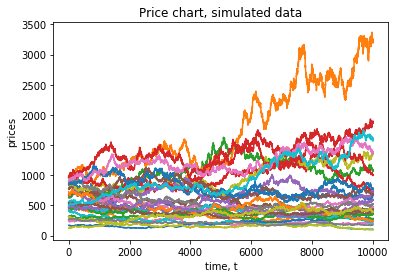

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots()
axes.plot(P)
axes.set_xlabel('time, t')
axes.set_ylabel('prices')
axes.set_title('Price chart, simulated data');

However, we are not primarily intrested in the prices $P_{t}$, but rather the returns $R_{t}$.